## Imports

In [1]:
import numpy as np
from scipy.constants import c, m_p, e
import matplotlib.pyplot as plt

## Converting time to energy

In [2]:
def synchrotron_momentum(max_E, time):
    mpeV = m_p * c**2 / e           # Proton mass in eV
    R0 = 26                         # Mean machine radius
    n_dip = 10                      # Number of dipoles
    dip_l = 4.4                     # Dipole length
    
    dip_angle = 2 * np.pi / n_dip   # Dipole bending angle
    rho = dip_l / dip_angle         # Dipole radius of curvature
    omega = 2 * np.pi * 50   
    
    Ek = np.array([70, max_E]) * 1e6 # Injection and extraction kinetic energies 
    E = Ek + mpeV                    # Injection and extraction kinetic energies
    p = np.sqrt(E**2 - mpeV**2)      # Injection and extraction momenta

    B = p / c / rho                  # Ideal magnetic field at injection and extraction energies
    
    Bdip = lambda t: (B[1] + B[0] - (B[1] - B[0]) * np.cos(omega * t)) / 2  # Idealised B-field variation with AC
    pdip = lambda t: Bdip(t) * rho * c                                      # Momentum from B-field in MeV
    
    return pdip(time*1E-3)

In [3]:
def synchrotron_kinetic_energy(max_E, time):
    mpeV = m_p * c**2 / e           # Proton mass in eV    
    # Relativistic Kinetic Energy = Relativistic Energy - mass
    return (np.sqrt(synchrotron_momentum(max_E, time)**2 + mpeV**2) - mpeV) # Return array in eV
    #return (np.sqrt(synchrotron_momentum(max_E, time)**2 + mpeV**2) - mpeV)/1E6 # Return array in MeV

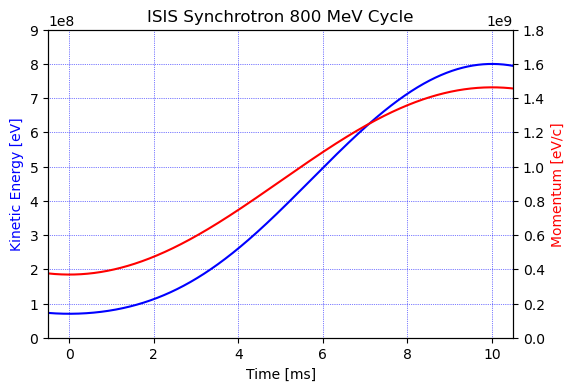

In [4]:
time_points = 2200
time_array = np.linspace(-0.5, 10.5, time_points)   
time_array    

assert len(time_array) == 2200, 'Length of time array is not 2200'  
E_max = 800  
synchrotron_momentum_array = synchrotron_momentum(E_max, time_array)   
synchrotron_kinetic_energy_array = synchrotron_kinetic_energy(E_max, time_array)

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=[6, 4])
gs = fig1.add_gridspec(ncols=1,nrows=1, height_ratios=[1])
gs.update(wspace=0.025, hspace=0.)
ax1 = fig1.add_subplot(gs[0,0])
ax2 = ax1.twinx()

ax2.plot(time_array, synchrotron_momentum_array, color='r')
ax2.set_ylabel('Momentum [eV/c]', color='r')
ax2.set_ylim(0, 1.8E9)

ax1.plot(time_array, synchrotron_kinetic_energy_array, color='b')
ax1.set_ylabel('Kinetic Energy [eV]', color='b')
ax1.set_ylim(0, 900E6)

ax1.set_xlim(-0.5, 10.5)
ax1.set_xlabel('Time [ms]')
ax1.set_title('ISIS Synchrotron 800 MeV Cycle')

ax1.grid(True, which='both', ls=':', lw=0.5, color='b')

## Data points input function

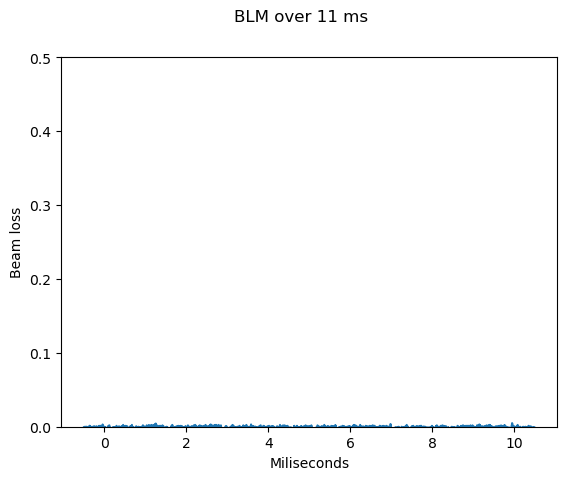

Please enter number of data points: 


ValueError: invalid literal for int() with base 10: ''

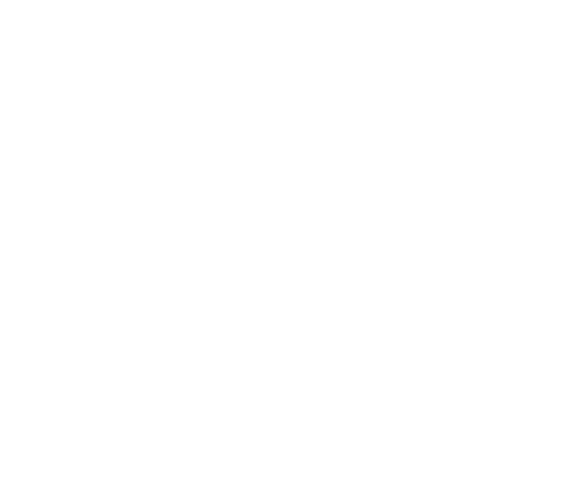

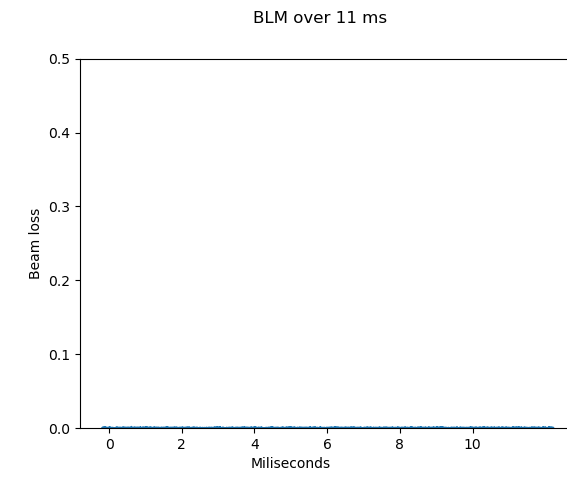

In [10]:
dataframe = 2200

def numData_points():
    Data_points = 2200
    Data_points = (int(input("Please enter number of data points: ")))
    if Data_points > int(dataframe):
        Data_points = int(dataframe)
        print("Data points set to max dataframe points")
    return Data_points

points = numData_points()

2200


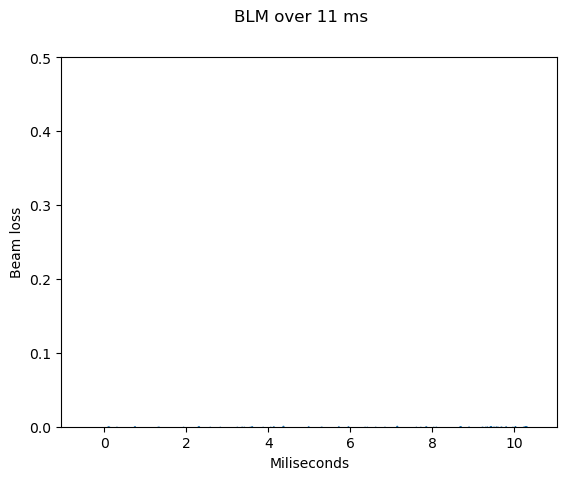

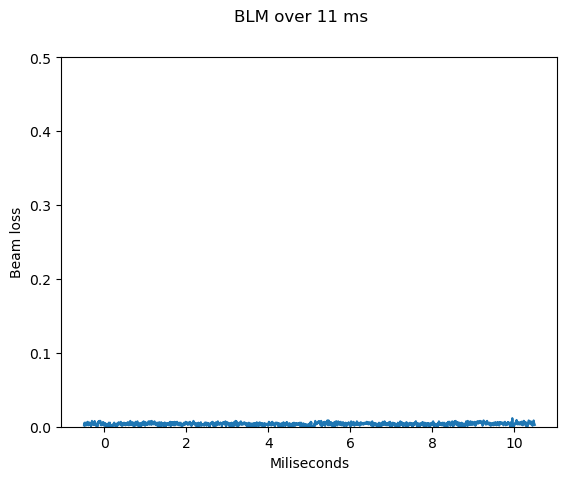

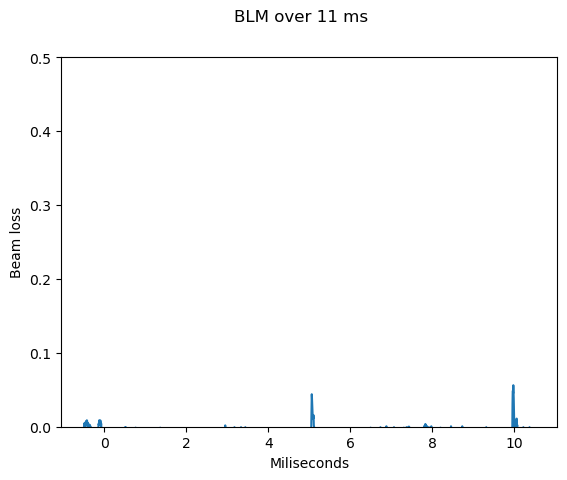

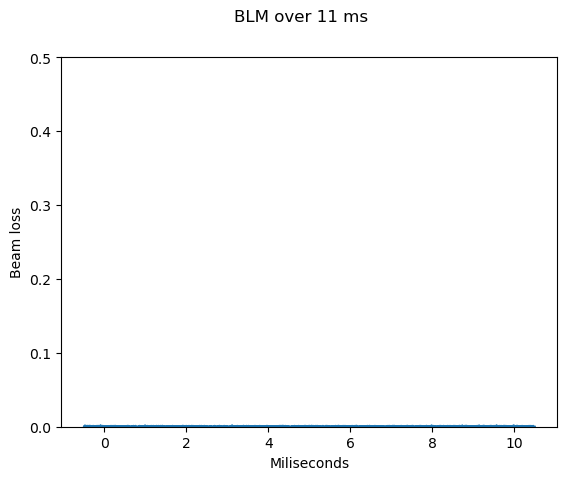

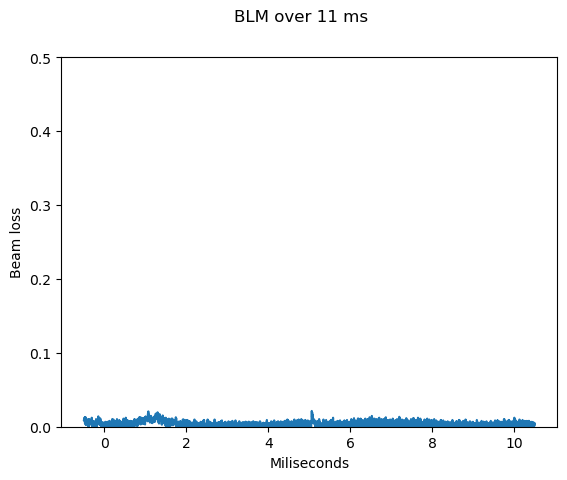

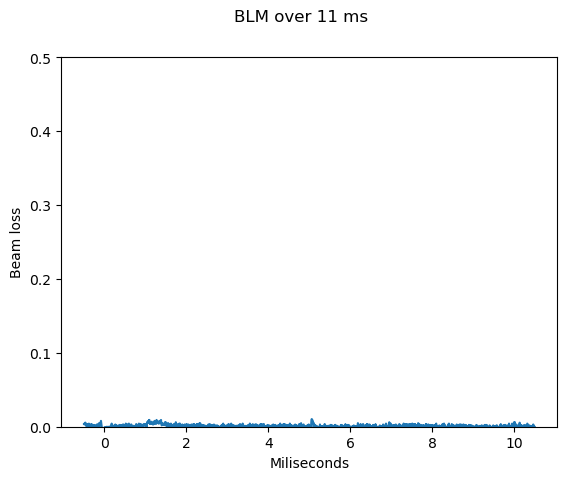

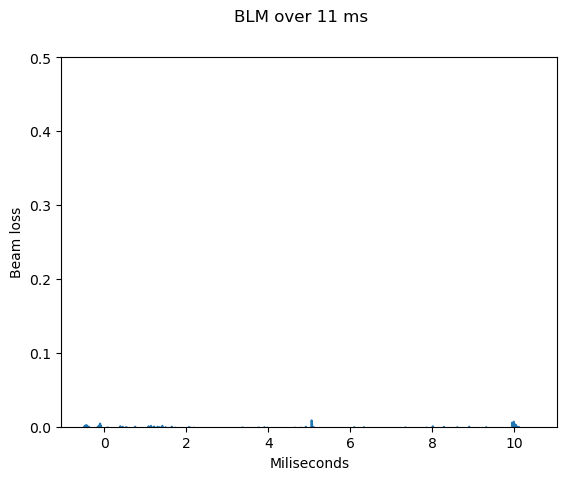

In [11]:
print(points)

## Recieving data from MQTT and .csv files (1E Data Handling)

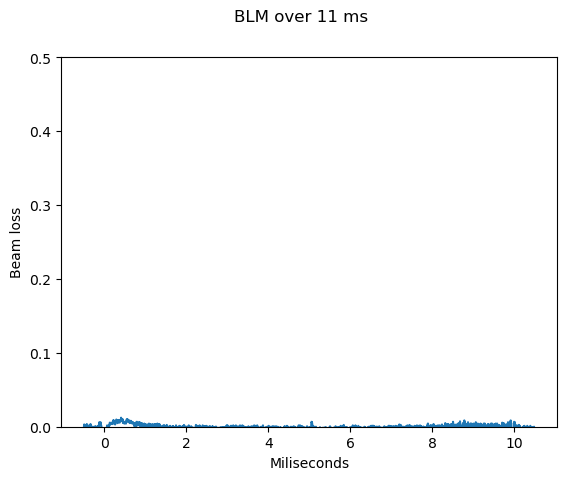

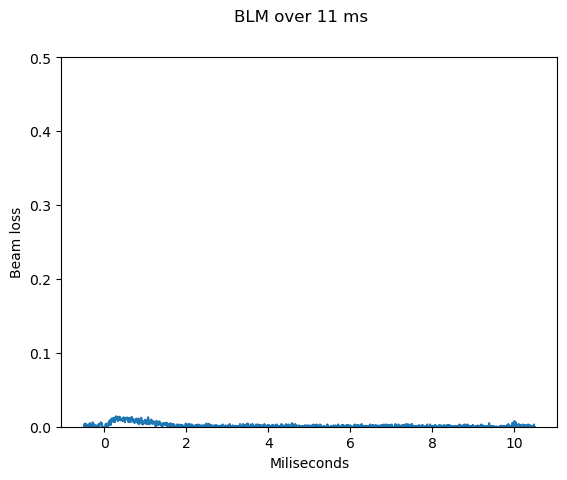

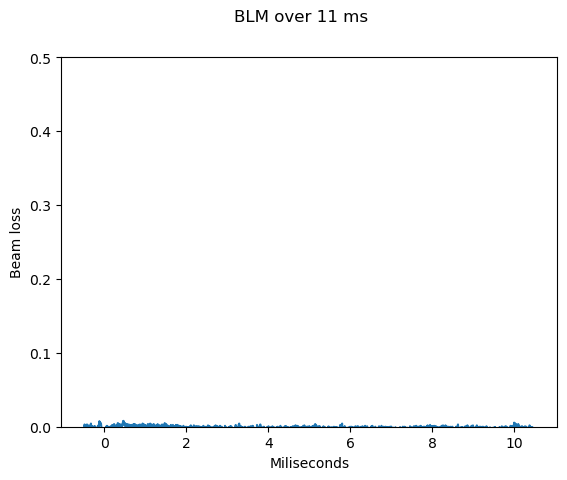

Connected to topic: ac_phys/workxp/live_signals


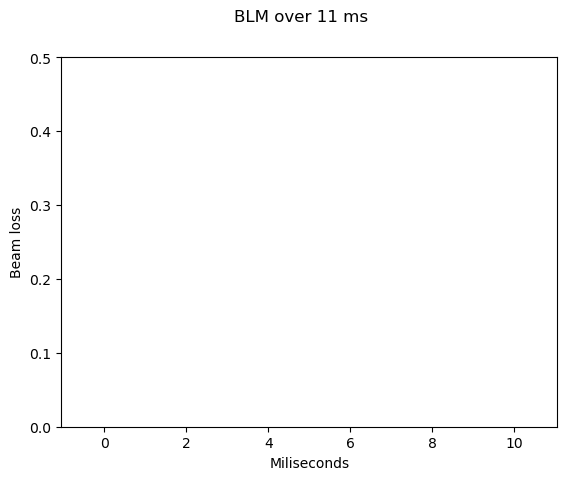

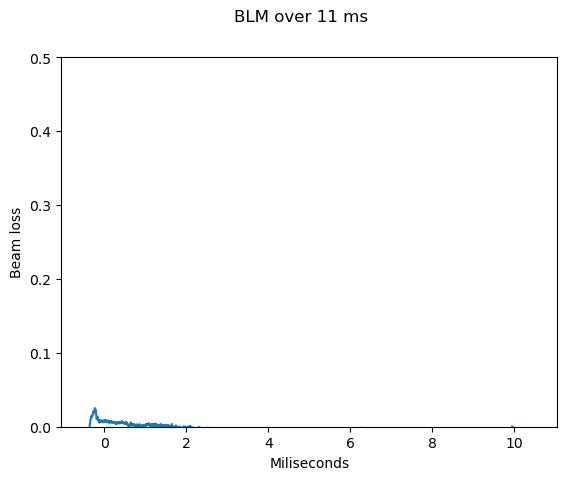

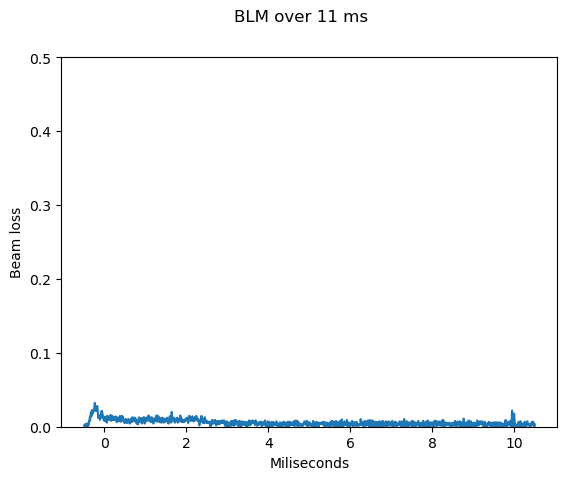

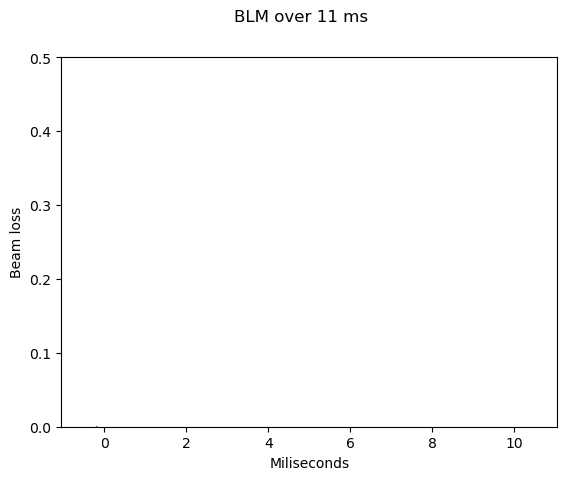

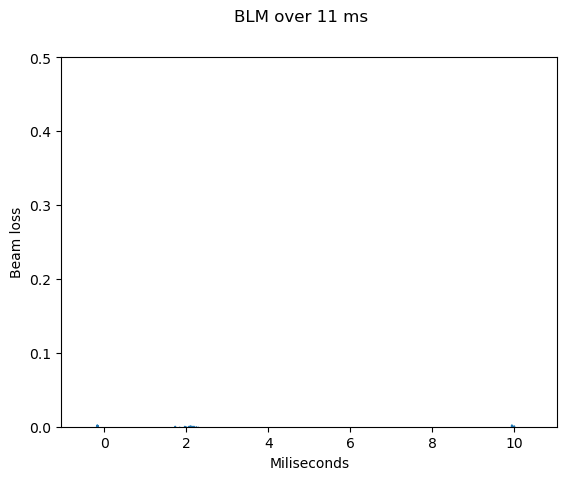

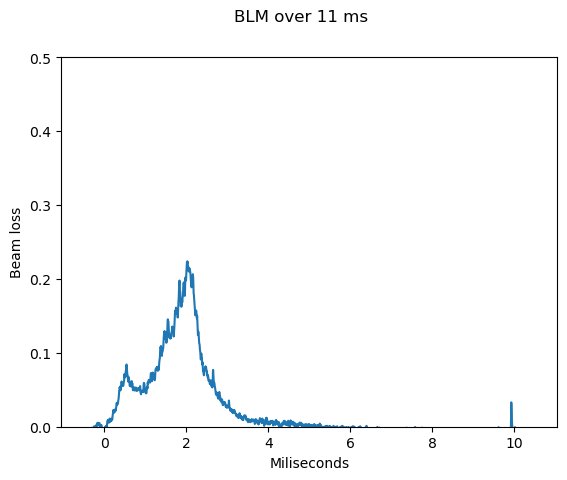

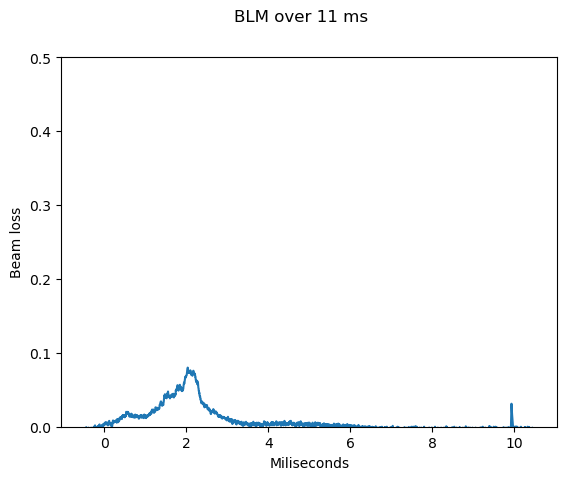

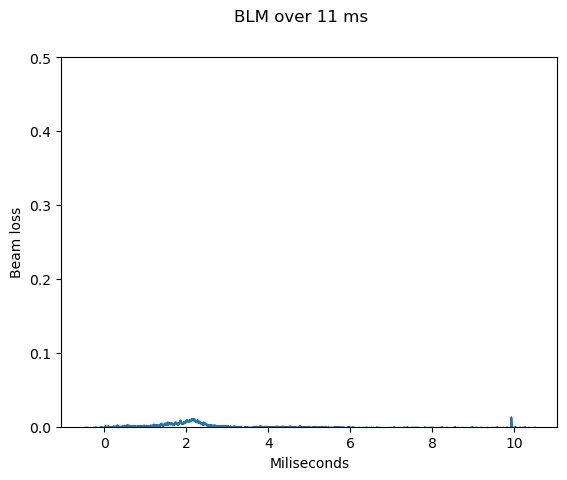

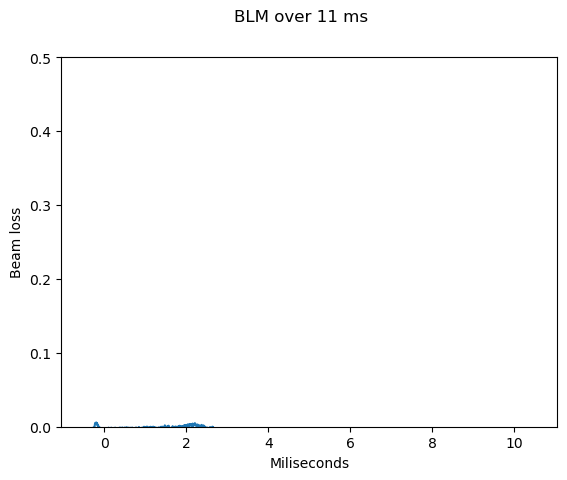

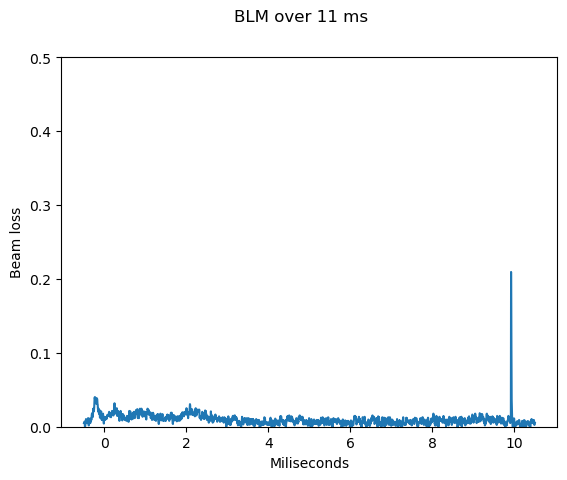

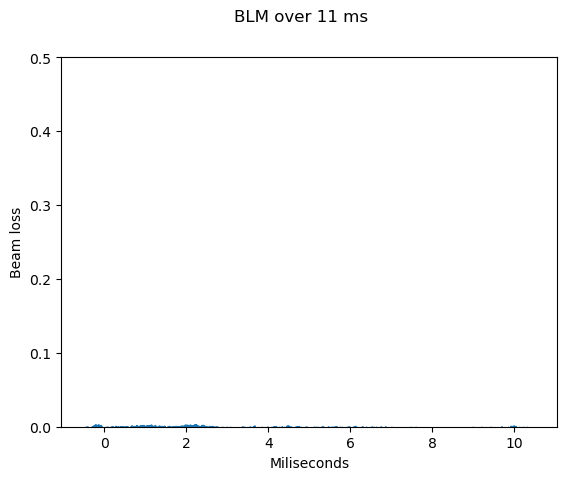

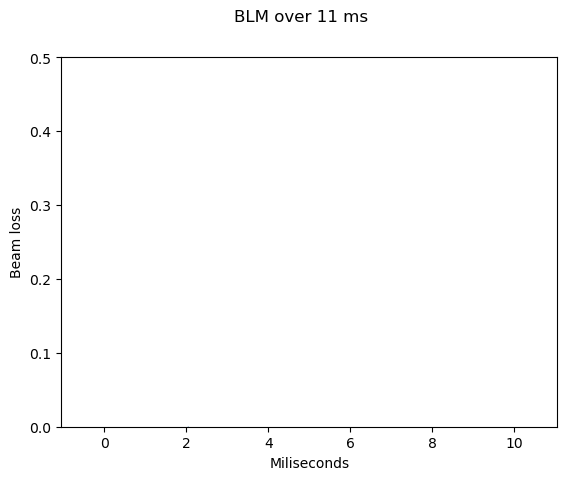

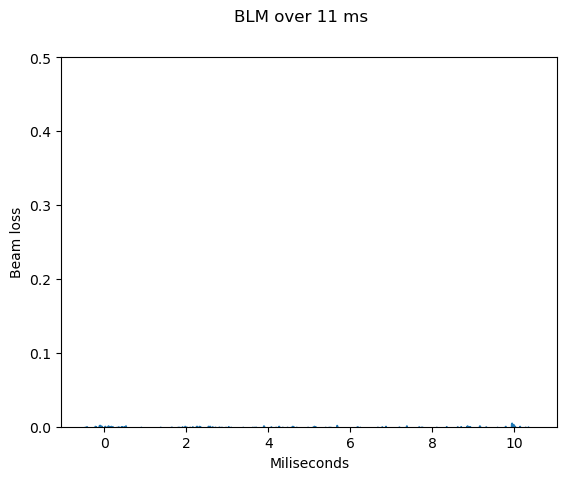

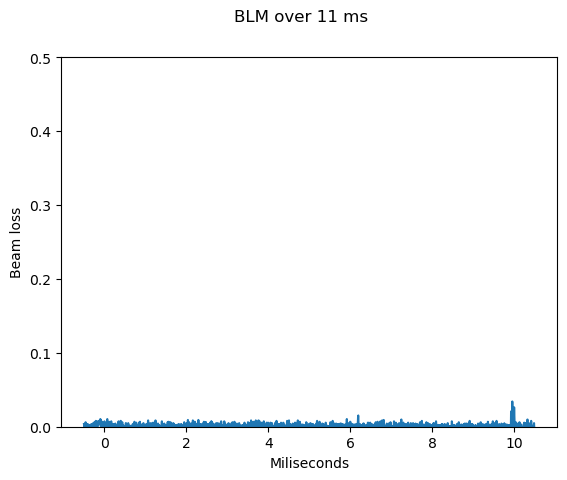

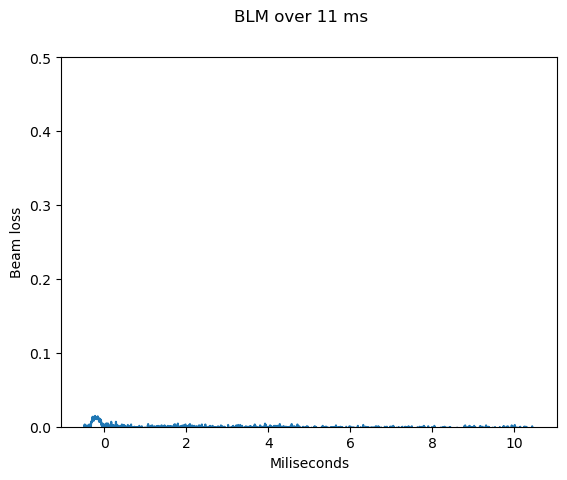

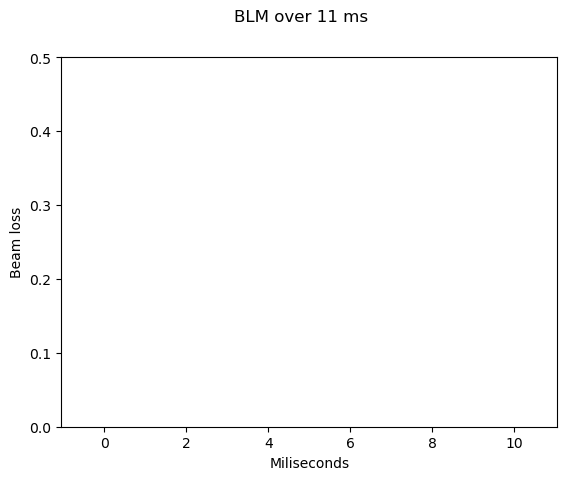

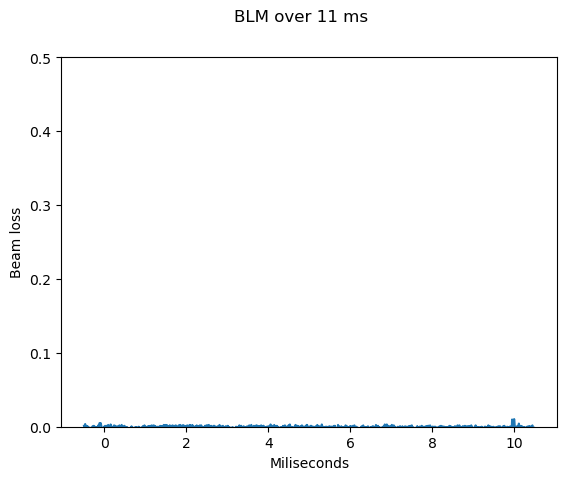

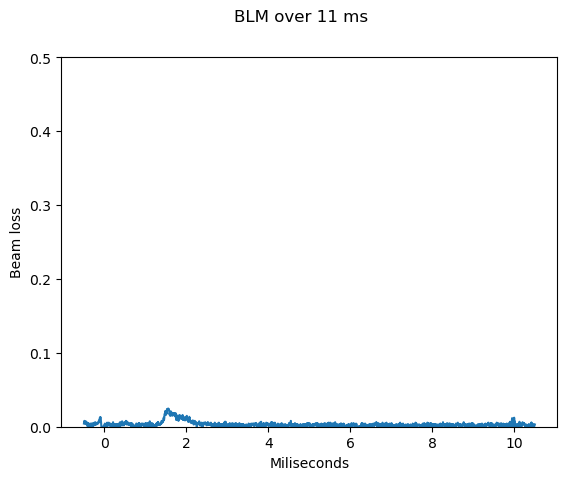

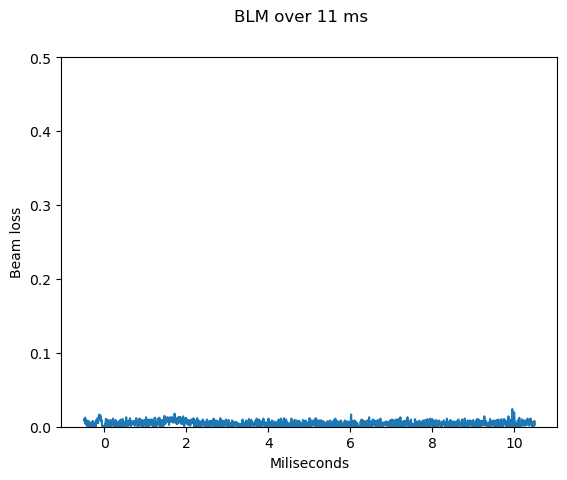

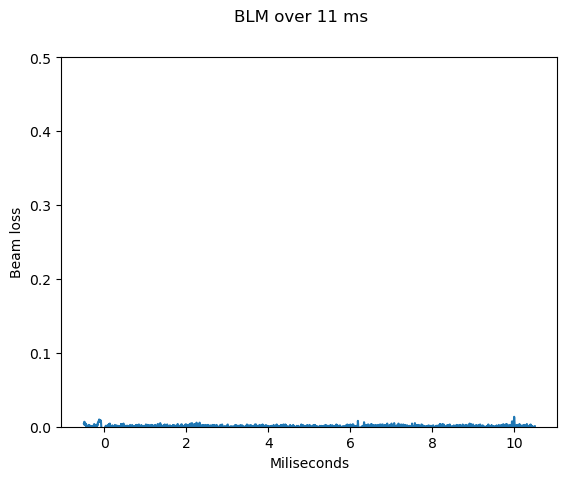

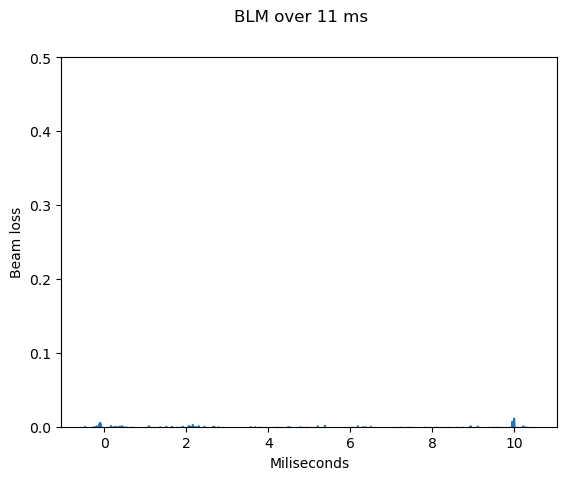

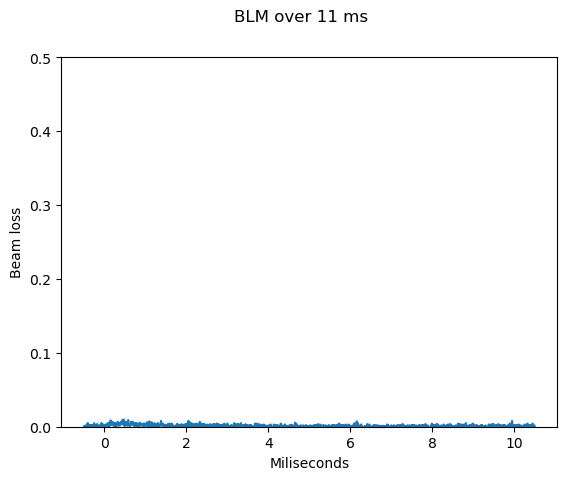

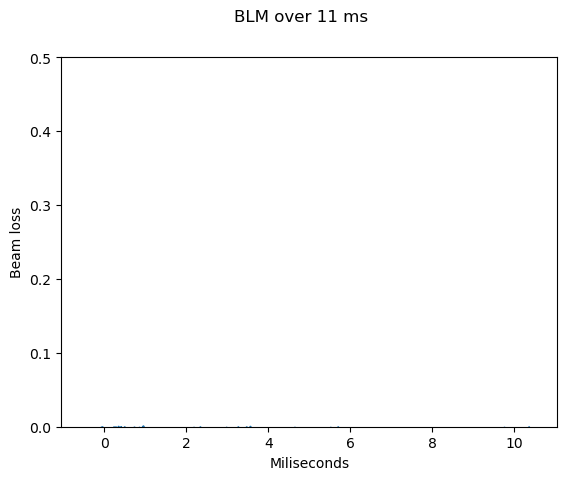

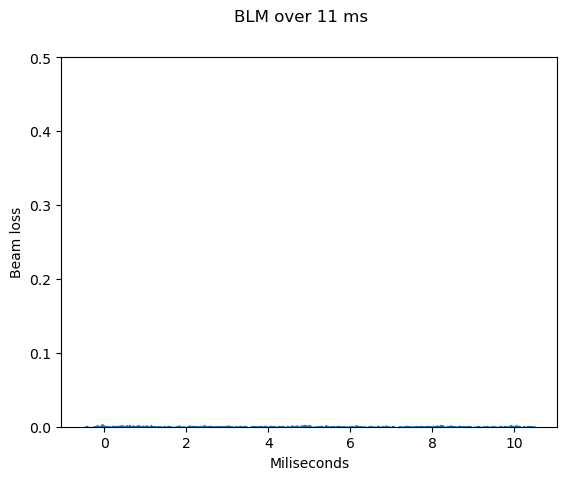

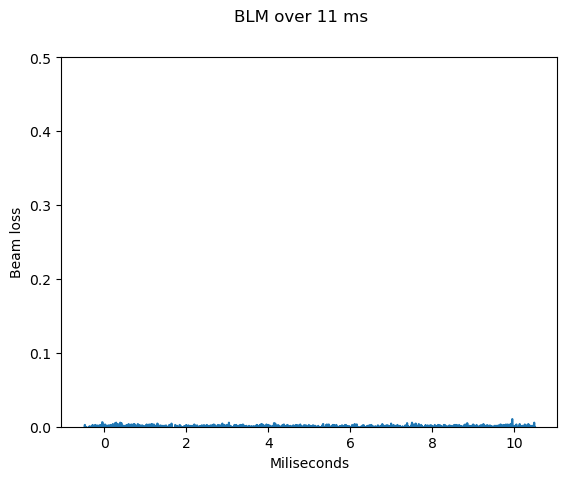

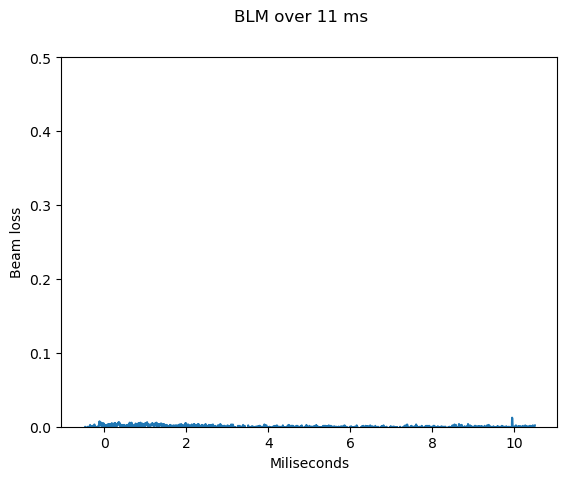

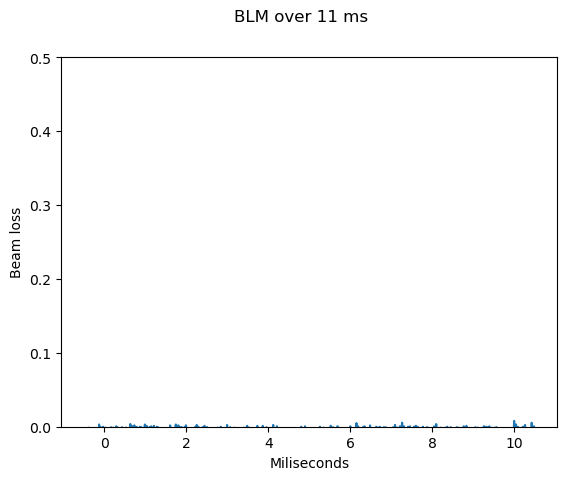

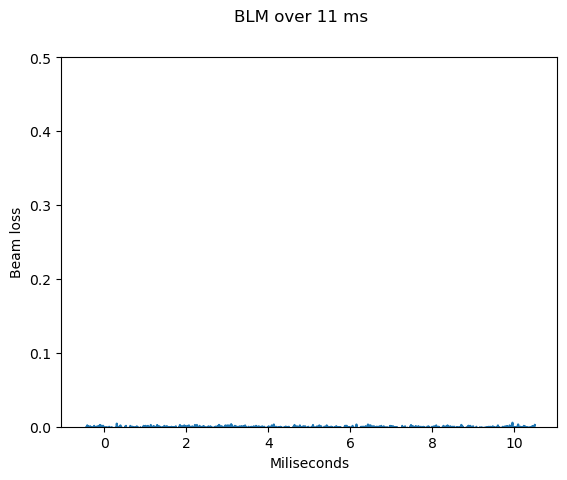

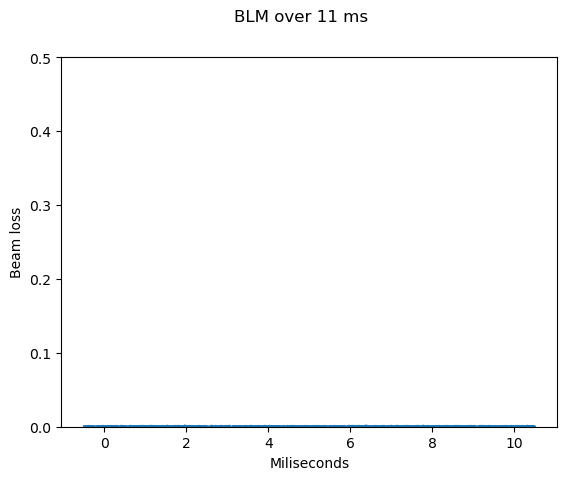

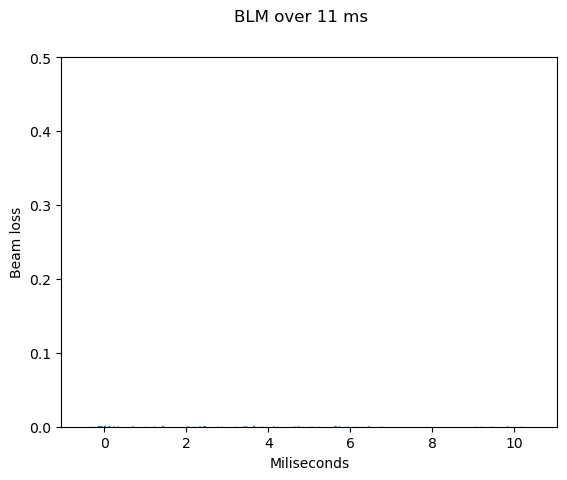

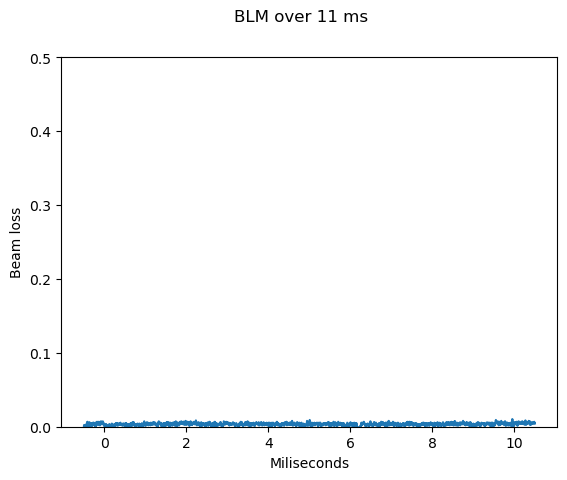

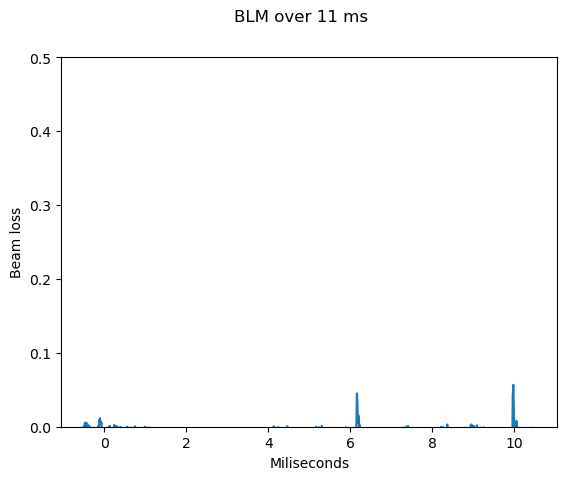

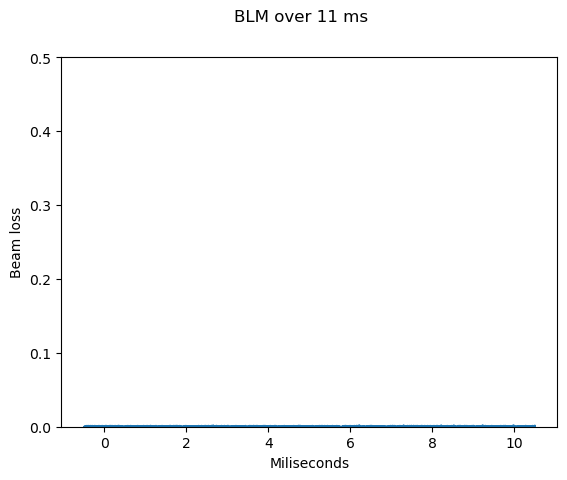

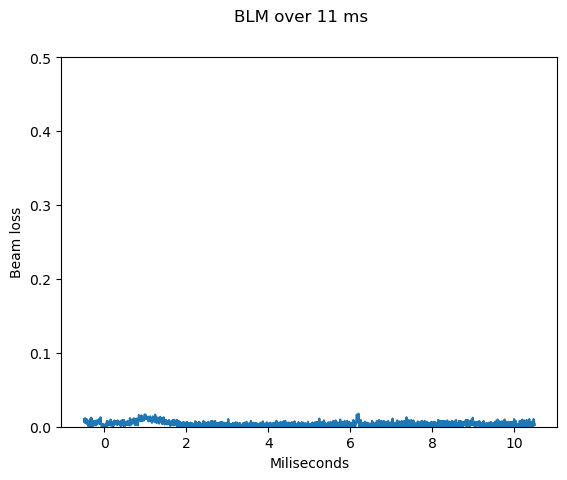

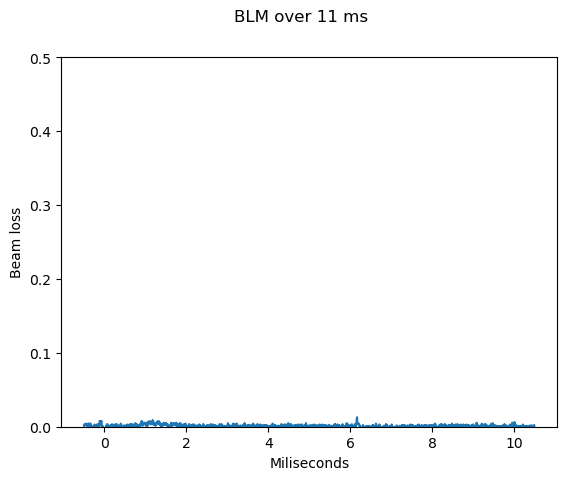

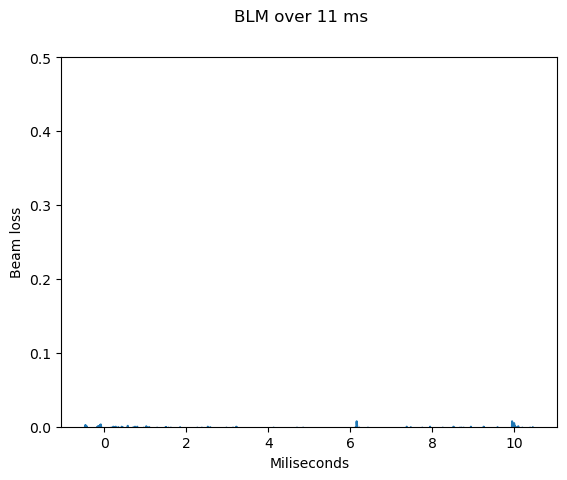

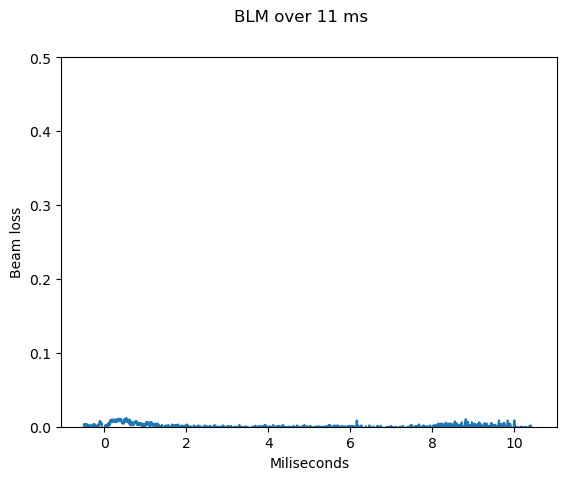

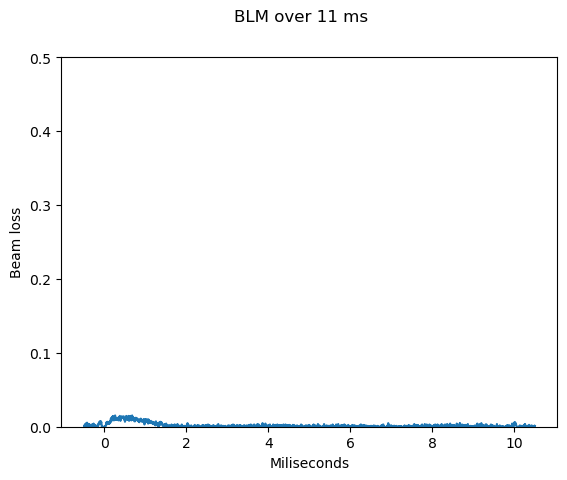

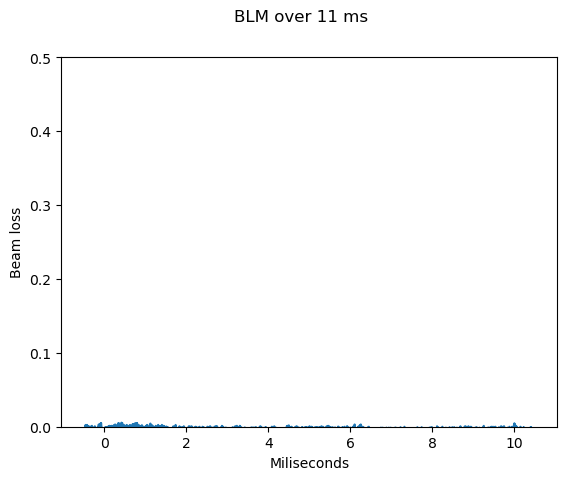

Connected to topic: ac_phys/workxp/live_signals


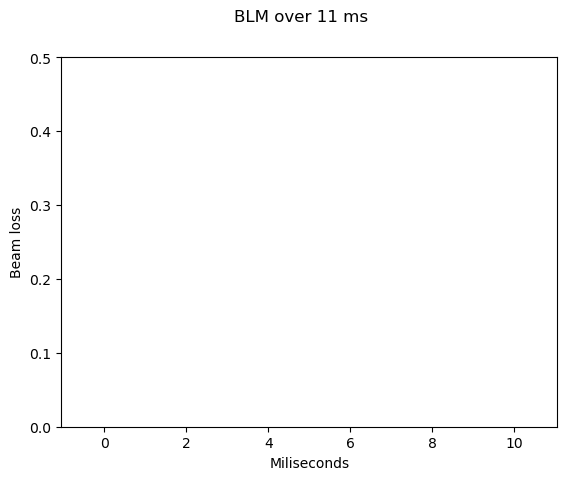

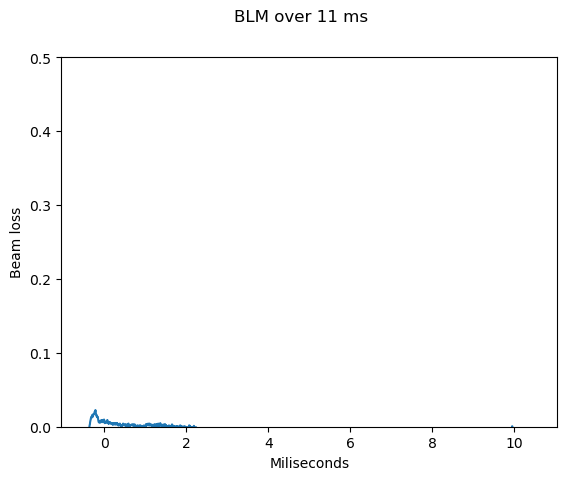

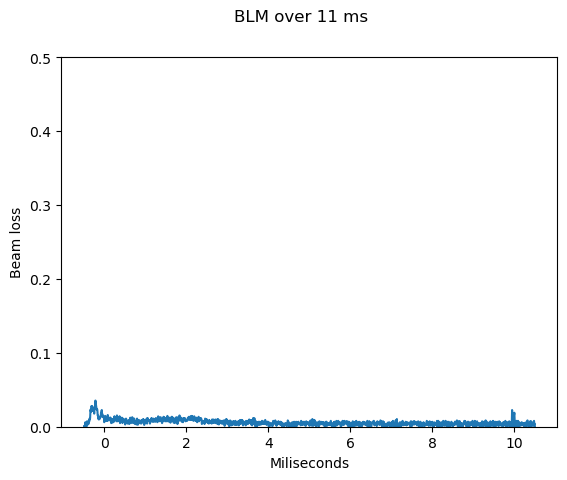

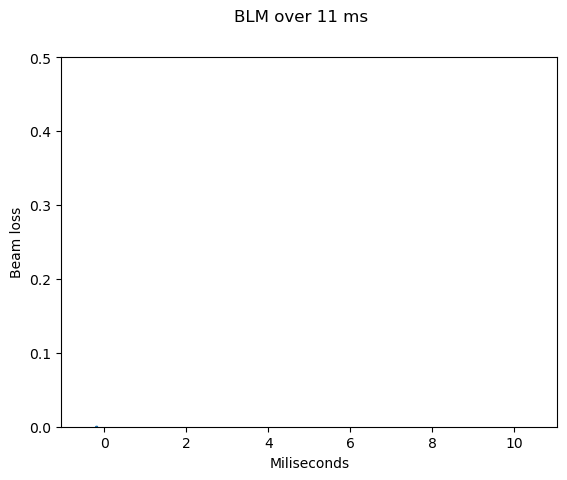

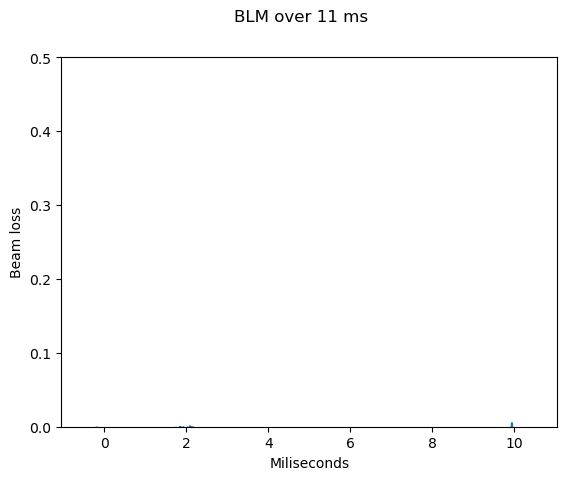

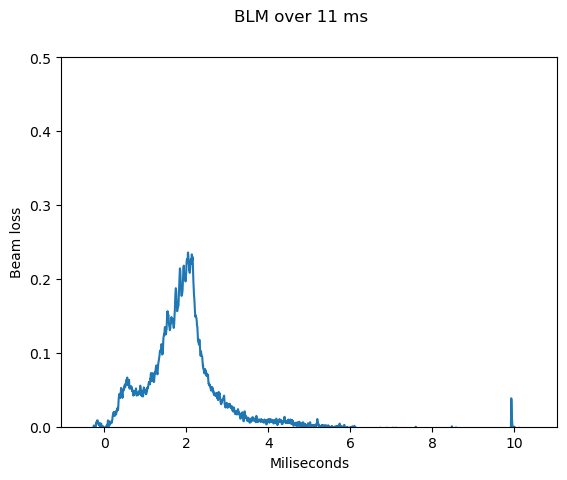

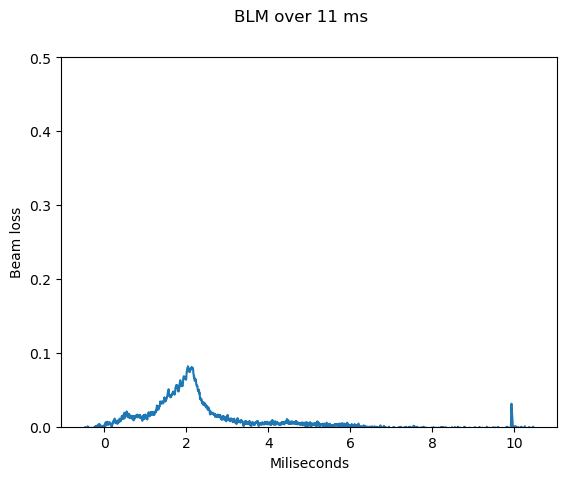

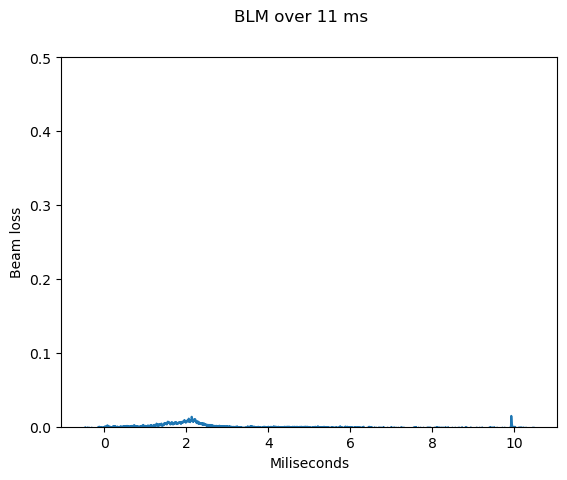

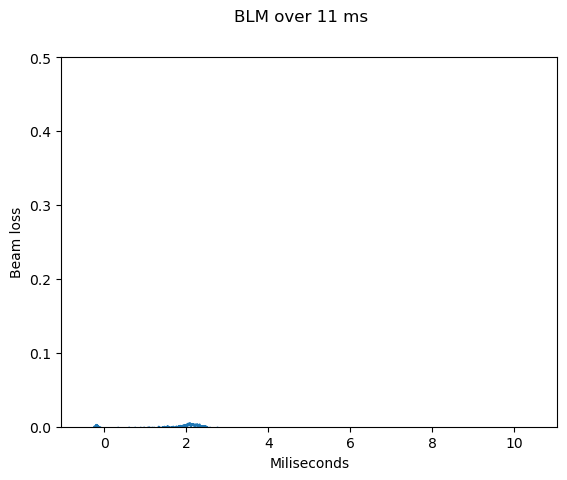

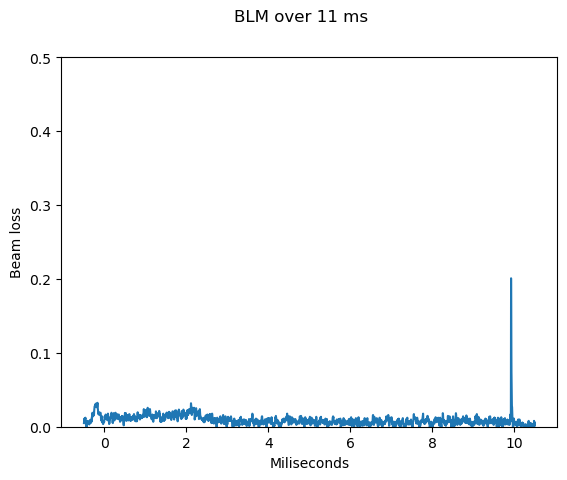

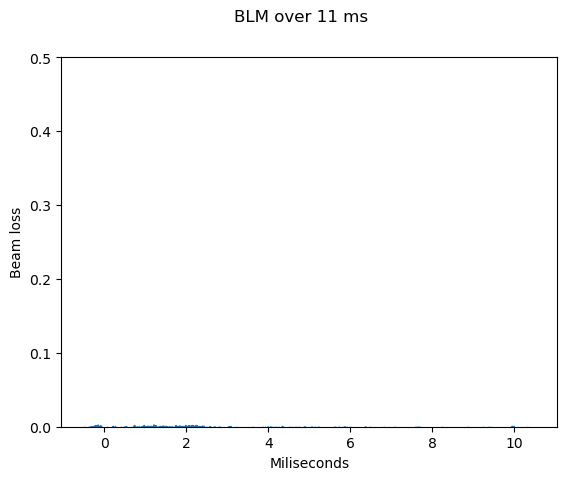

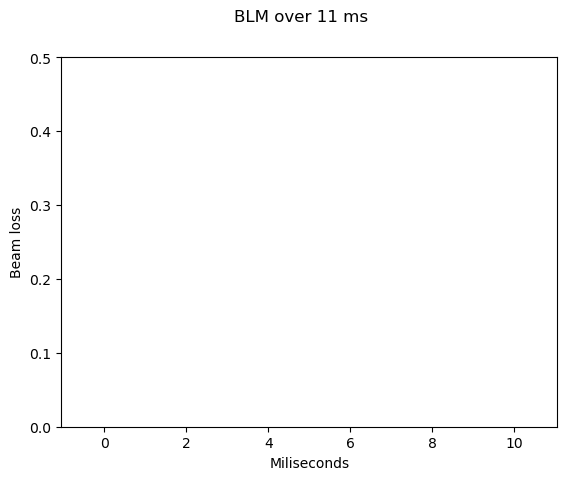

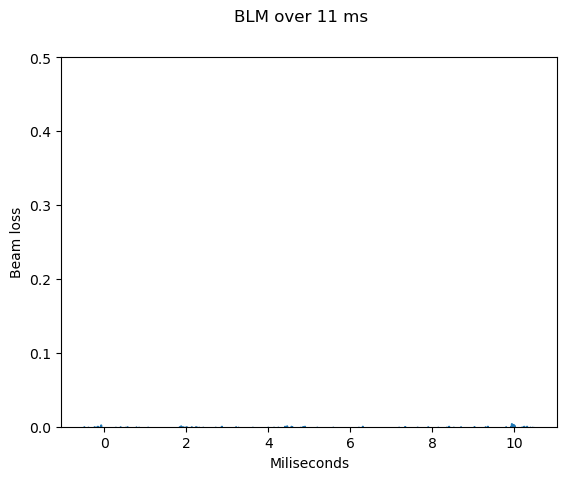

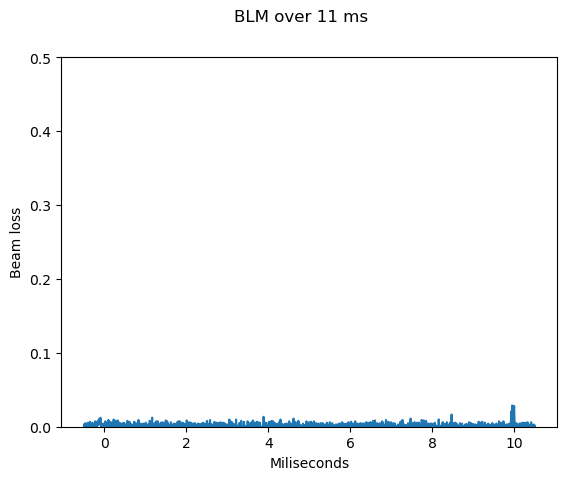

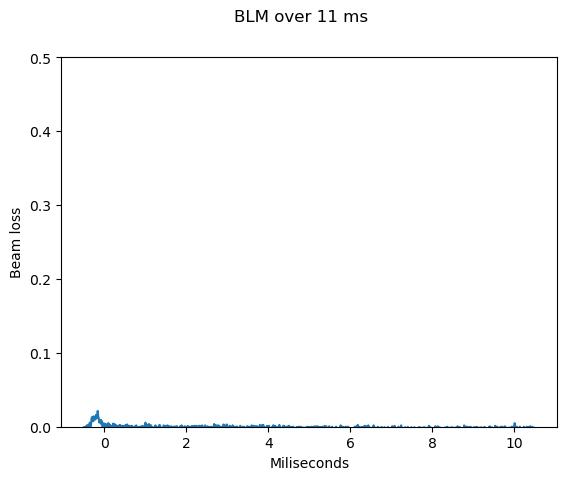

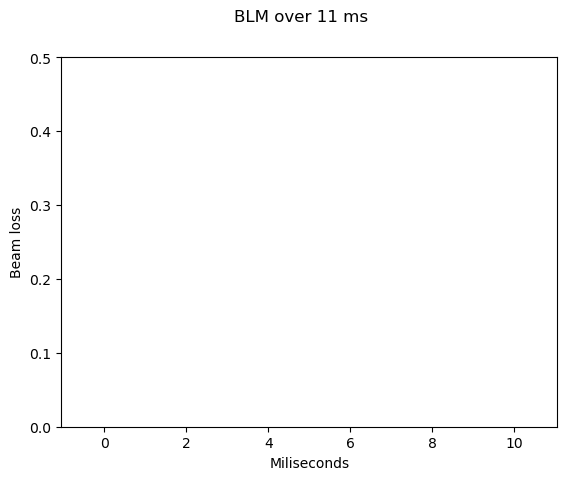

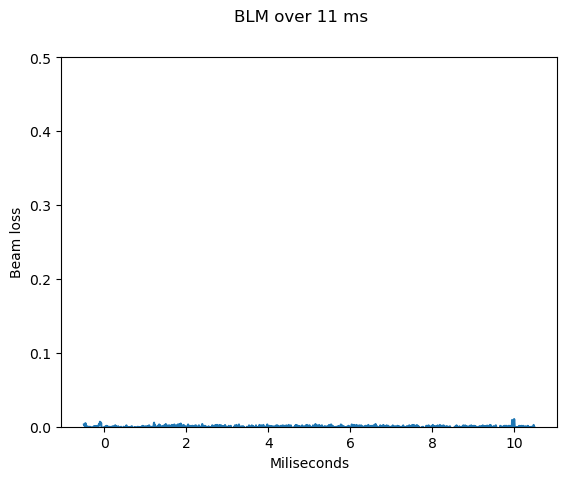

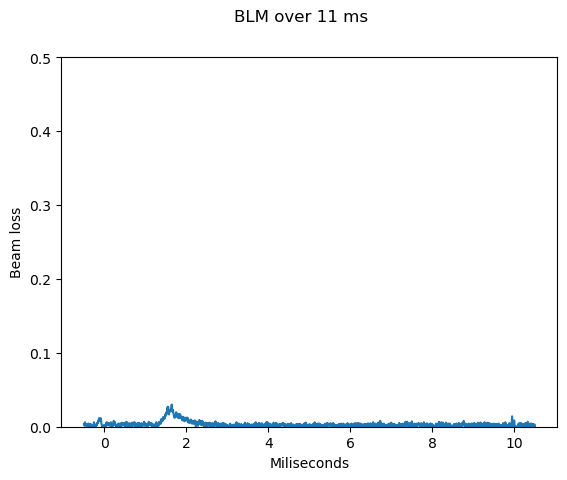

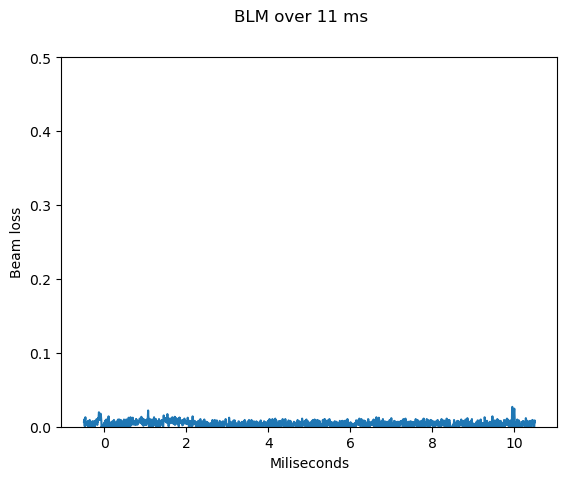

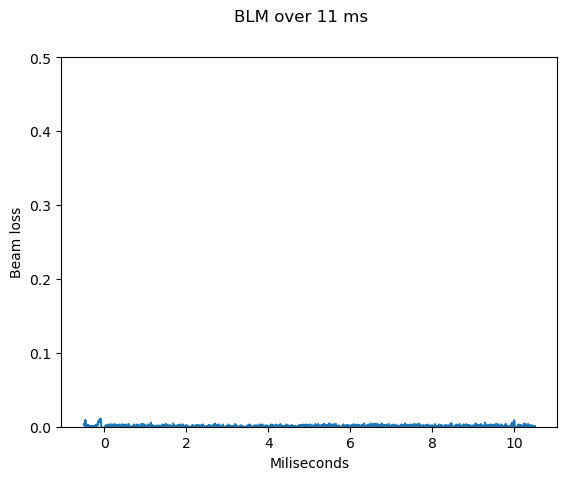

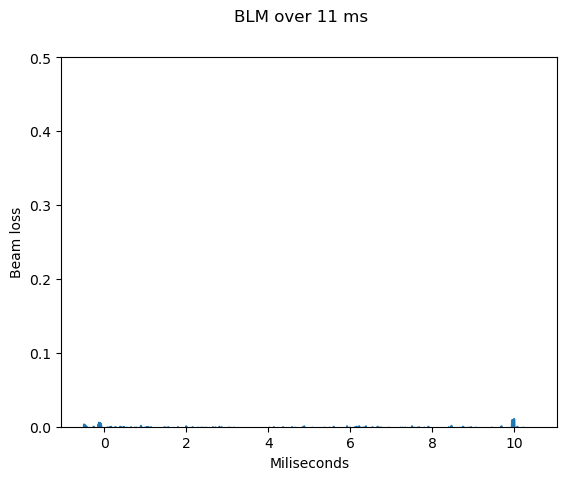

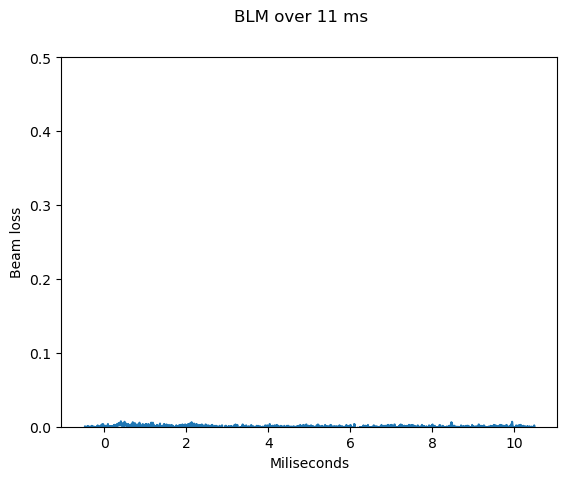

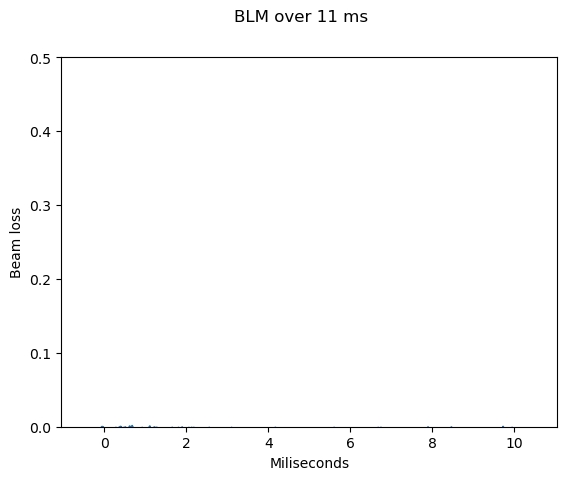

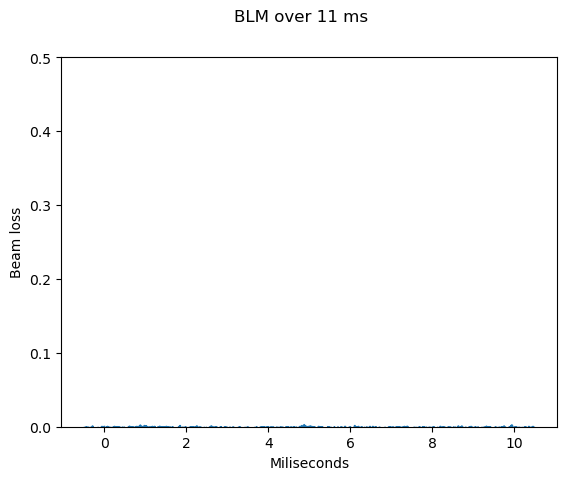

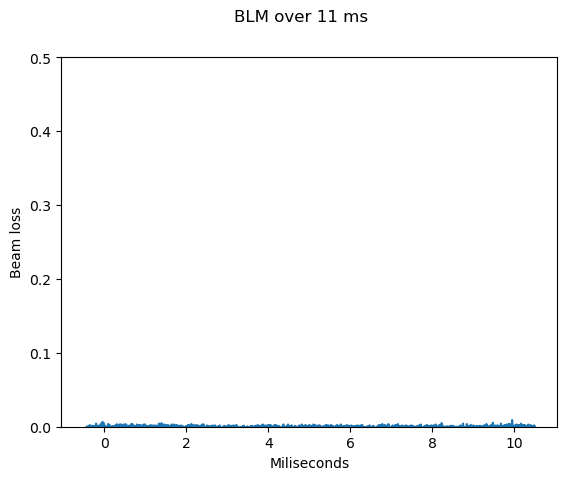

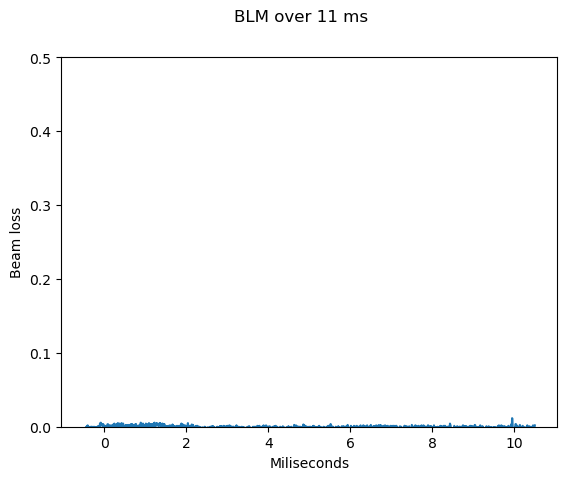

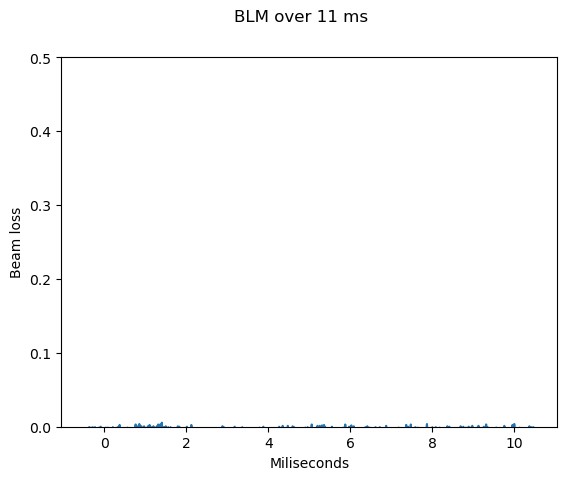

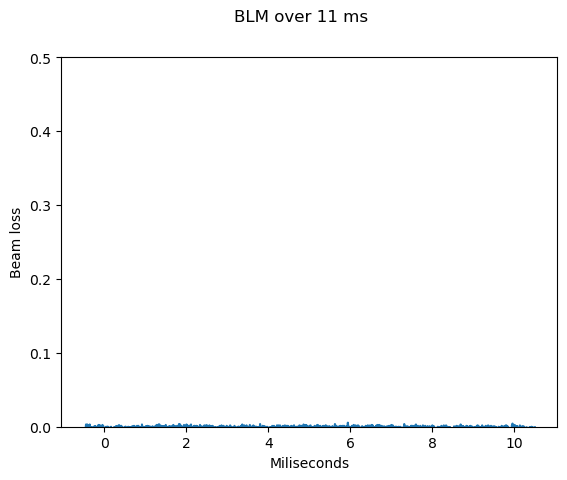

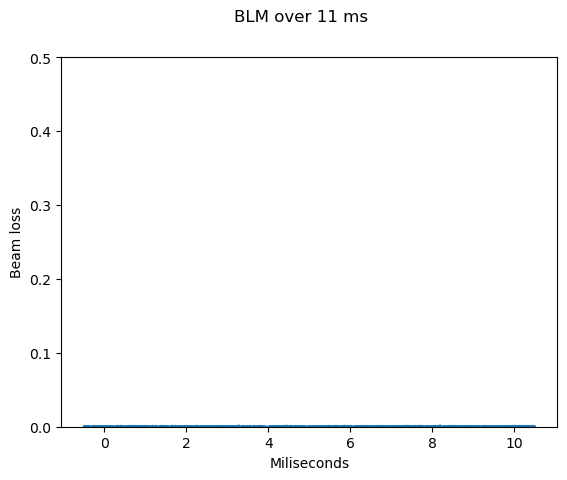

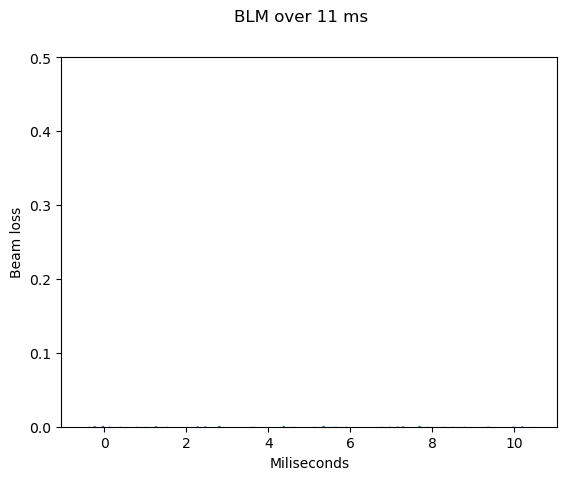

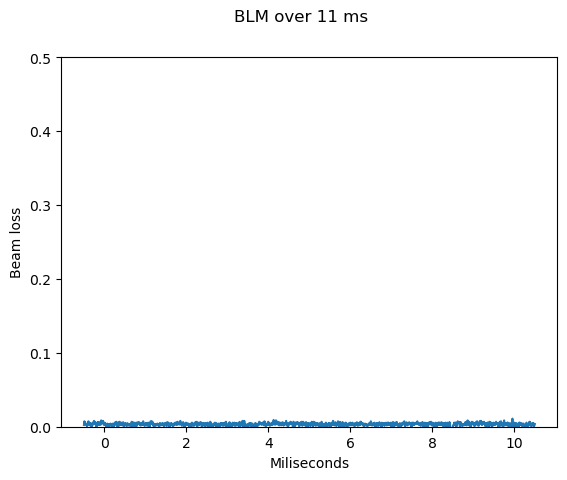

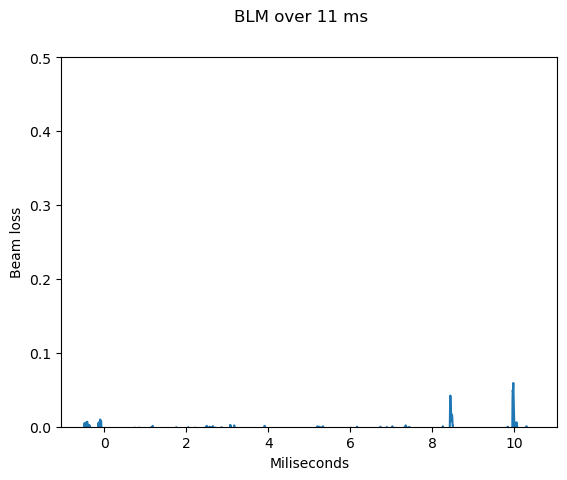

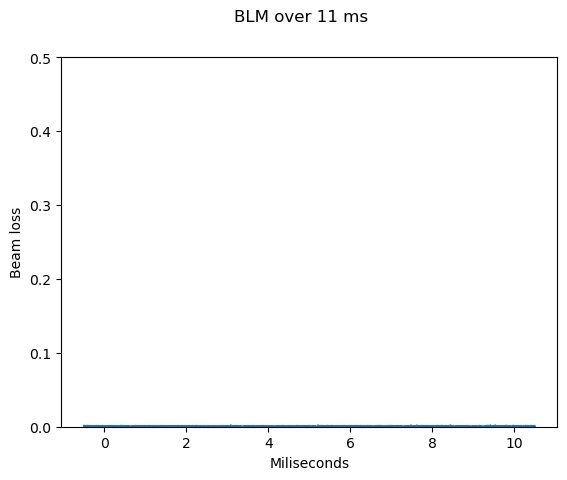

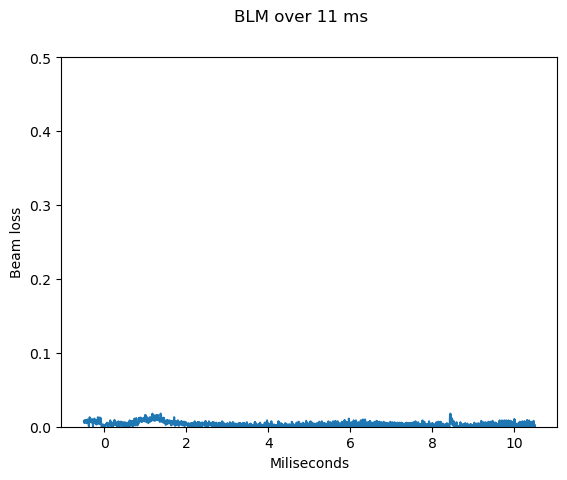

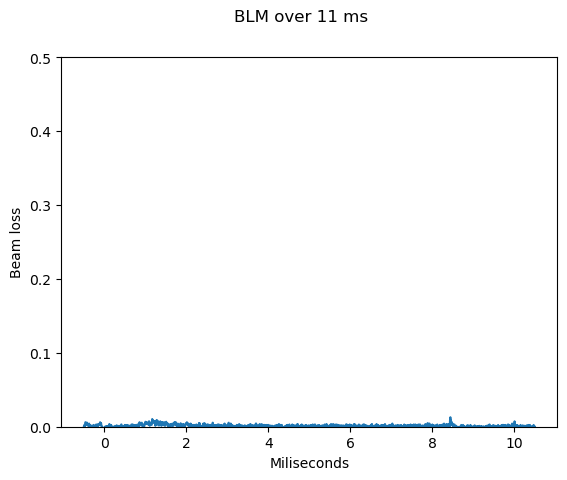

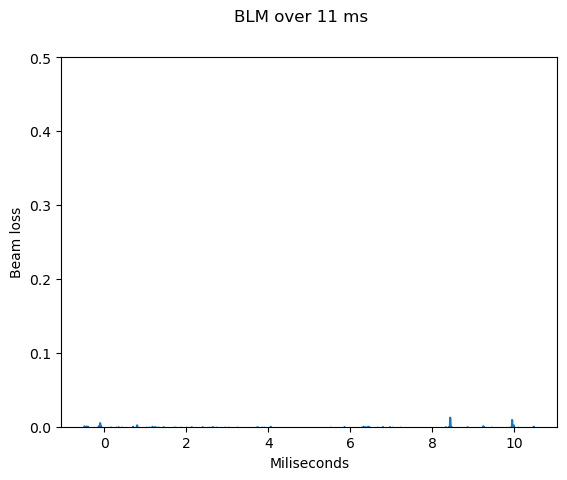

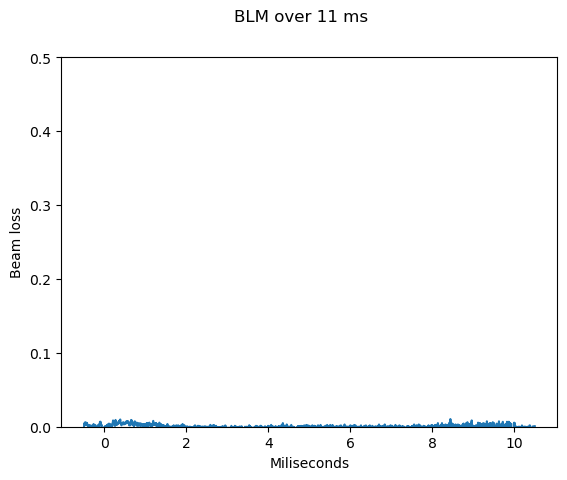

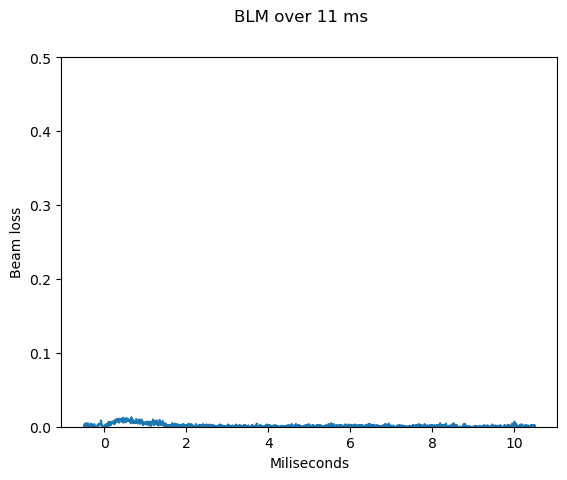

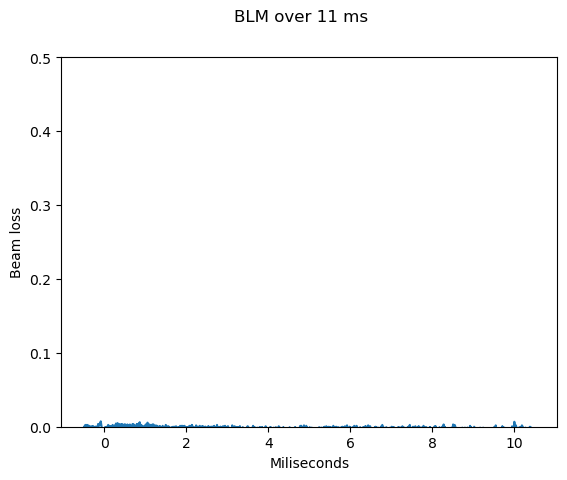

Disconnected from: ac_phys/workxp/live_signals
Disconnected from: ac_phys/workxp/live_signals
Connected to: ac_phys/workxp/live_signals
Connected to topic: ac_phys/workxp/live_signals


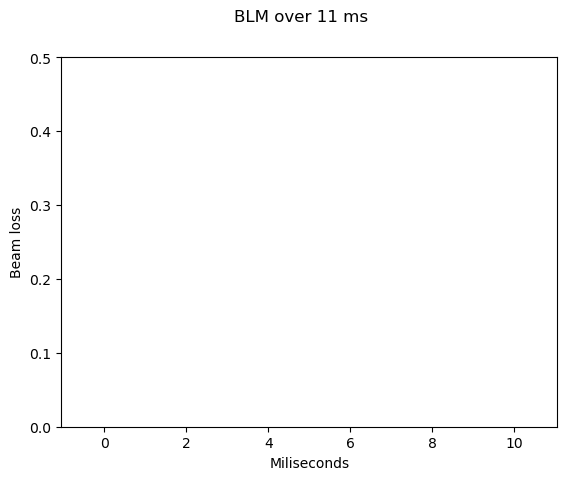

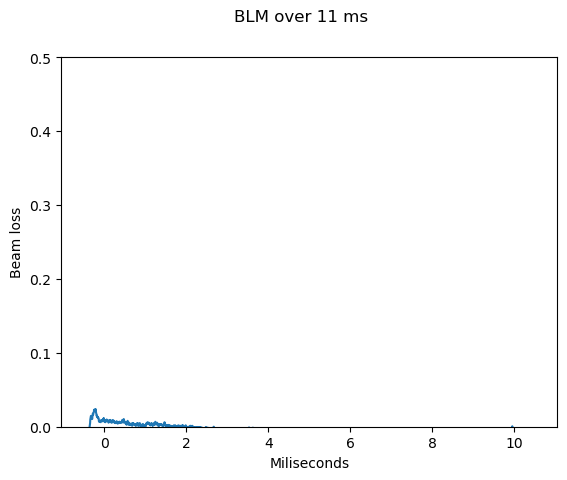

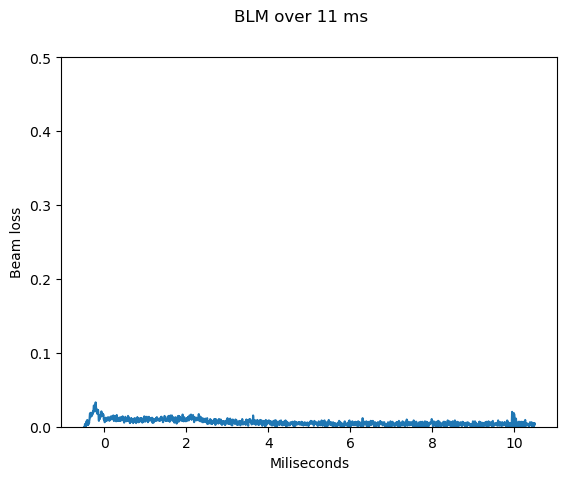

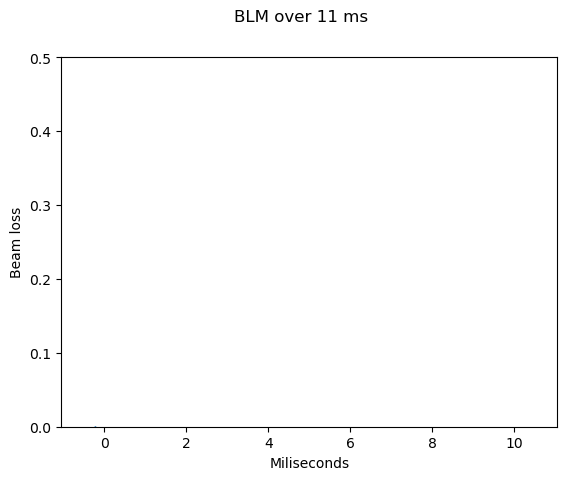

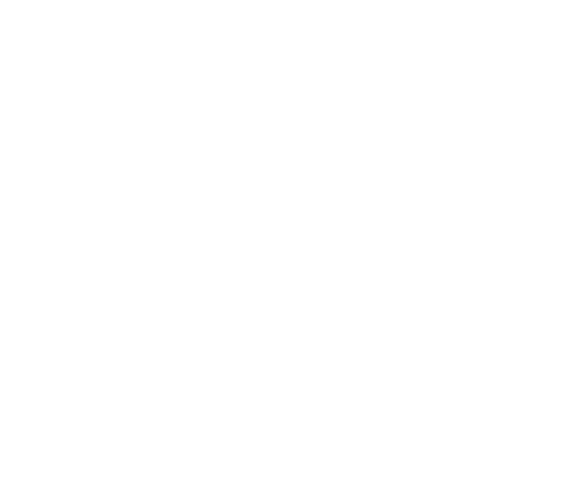

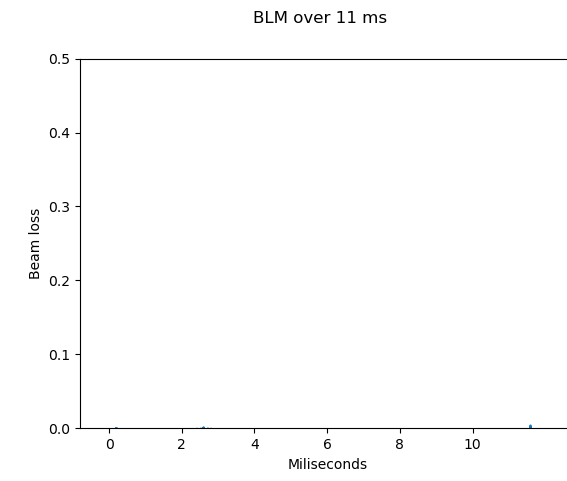

In [12]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install paho-mqtt

In [13]:
import sys
import numpy as np
import multiprocessing
import paho.mqtt.client as mqtt
from PyQt5.QtGui import * 
import PyQt5.QtWidgets as qt
from PyQt5.QtCore import *
from matplotlib.backends.backend_qt5agg import (FigureCanvas, NavigationToolbar2QT as NavigationToolbar)
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from PyQt5 import QtCore, QtGui, QtWidgets
import string
import json
import random
import time

mstime = np.linspace(-0.5, 10.5, 2200)

Connected to: ac_phys/workxp/live_signals
Connected to topic: ac_phys/workxp/live_signals


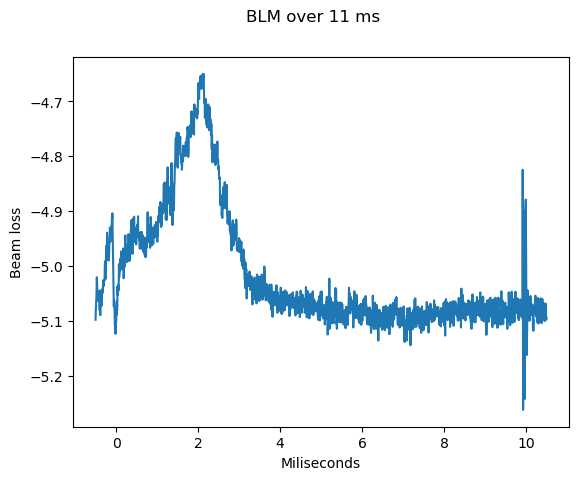

Connected to topic: ac_phys/workxp/live_signals


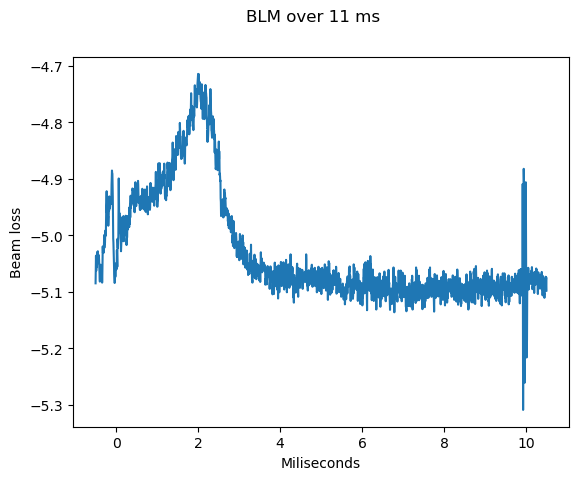

Connected to topic: ac_phys/workxp/live_signals


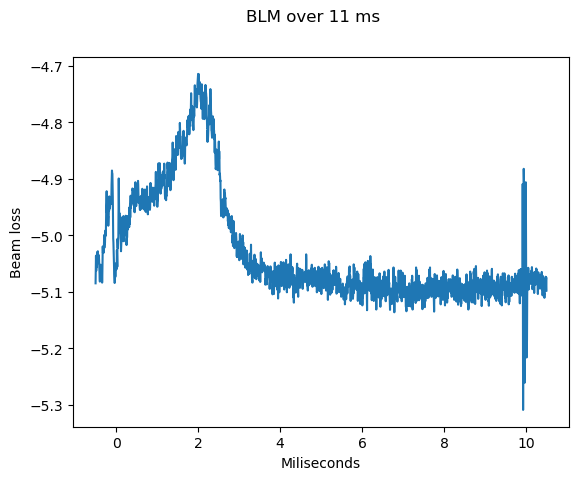

Connected to topic: ac_phys/workxp/live_signals


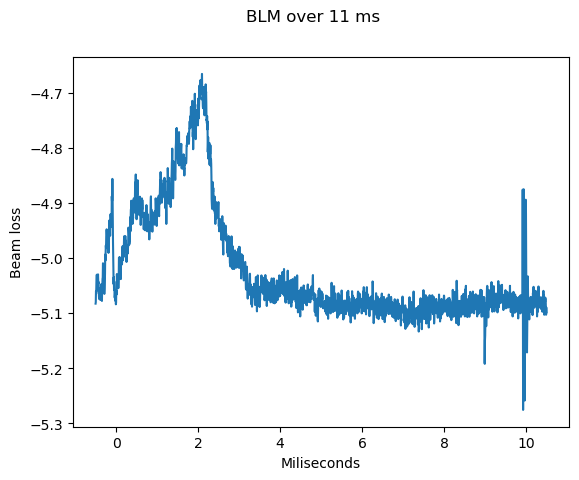

Disconnected from: ac_phys/workxp/live_signals


In [32]:
def generate_shortuuid() -> str:
    """Public function for generating short UUID messages"""
    alphabet = string.ascii_lowercase + string.ascii_uppercase + string.digits
    shortuiid = "".join(random.choices(alphabet, k=12))
    return shortuiid

class MQTTClient(mqtt.Client):
    def __init__(self, topic_name, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.topic_name = topic_name
        
    def on_connect(self, client, userdata, flags, rc):
        print('Connected to: ' + str(self.topic_name))
        self.subscribe(self.topic_name)

    def on_disconnect(self, client, userdata, rc):
        print('Disconnected from: ' + str(self.topic_name))
        
    def on_message(self, client, userdata, message):
        print("Connected to topic: "+str(self.topic_name))
        client.subscribe(self.topic_name)
        msg_byte = message.payload
        msg_decode = np.frombuffer(msg_byte, dtype=float, count=-1, offset=0)
        msg_array = np.reshape(msg_decode, (40, 2200))
        
        summed = sum(msg_array[:38])
        plt.plot(mstime, summed)
        #plt.ylim(0, 0.5)
        plt.suptitle("BLM over 11 ms")
        plt.ylabel("Beam loss")
        plt.xlabel("Miliseconds")
        plt.show()

   
#   def update_plot(self, data):
#         self.fig.clear()
#         self.fig.subplots_adjust(top=0.925, bottom=0.13, left=0.085, right=0.95)
#         self.ax = self.fig.add_subplot(111)
#         self.ax.set_title('Live Plot of BLM Waveforms updated per second', fontsize=16)
#         self.ax.set_xlabel('Time (s)', fontsize = 14)
#         self.ax.set_ylabel('Voltage (V)', fontsize = 14)
#         self.ax.grid(color = "dimgray")
#         self.ax.set_ylim([-0.15, 0.4])
        

# this is the function that we actually run - it takes in two arguments: 
# the topic name to connect to and the time period, the length of 
# time to leave the connection open for.
def get_live_data(topic_name, time_period):
    client = MQTTClient(topic_name)
    client.connect("130.246.57.45", 8883, 60)
    client.loop_start()
    time.sleep(time_period)
    client.disconnect()
    client.loop_stop()
        
get_live_data("ac_phys/workxp/live_signals", 5)